# Lista 2

- Quais as 3 cores dos veículos mais vendidos?
- De qual ano são os veículos mais vendidos?
- Crie um barplot para apresentar sua resposta no item 2.
- Qual o percentual de vendas de veículos com transmissão automática?
- Crie um Pie Chart para representar sua resposta no item 4.
- Qual o percentual de venda de veículos por modelo?
- Calcule o percentual de vendas por preço de veículo e o percentual acumulado.
- Liste o total de veículos vendidos por ano e por tipo de transmissão (Dica: uma tabela de contingência faz isso para você com um comando).
- Imprima um resumo estatístico com o teste do qui-quadrado, graus de liberdade e valor-p do resultado do item anterior.
- Crie um barplot a partir do resultado do item 8.

In [1]:
import pandas
import warnings
import functools
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 7)

In [3]:
data = pandas.read_csv('../../datasets/dataset.csv')
data.head()

,ano,modelo,preco,kilometragem,cor,transmissao
0,2011,SEL,21992,7413,Bege,AUTO
1,2011,SEL,20995,10926,Cinza,AUTO
2,2011,SEL,19995,7351,Prata,AUTO
3,2011,SEL,17809,11613,Cinza,AUTO
4,2012,SE,17500,8367,Branco,AUTO


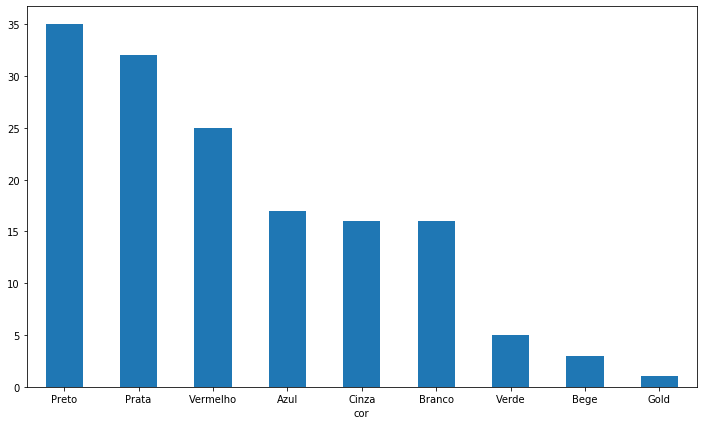

In [4]:
data \
    .groupby('cor')['cor'] \
    .count() \
    .sort_values(ascending=False) \
    .plot \
    .bar(rot=0)

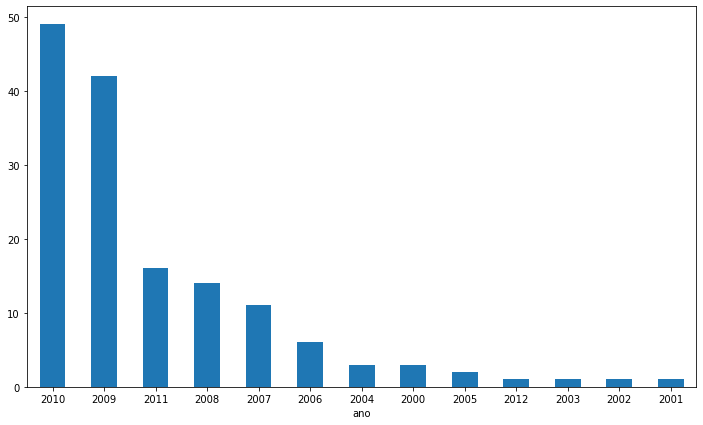

In [5]:
data. \
    groupby('ano')['ano'] \
    .count() \
    .sort_values(ascending=False) \
    .plot \
    .bar(rot=0)

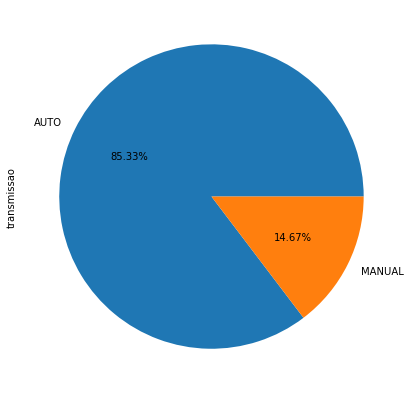

In [6]:
data \
    .groupby('transmissao')['transmissao'] \
    .count() \
    .sort_values(ascending=False) \
    .plot \
    .pie(autopct='%.2f%%')

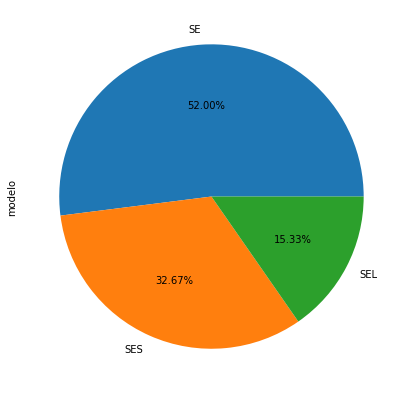

In [7]:
data \
    .groupby('modelo')['modelo'] \
    .count() \
    .sort_values(ascending=False) \
    .plot \
    .pie(autopct='%.2f%%')

In [8]:
data['preco'].describe()

count      150.000000
mean     12961.933333
std       3122.481735
min       3800.000000
25%      10995.000000
50%      13591.500000
75%      14904.500000
max      21992.000000
Name: preco, dtype: float64

In [9]:
def price_range(price):
    if 3800 <= price <= 6800:
        return '3800_6800'
    elif 6801 <= price <= 9800:
        return '6801_9800'
    elif 9801 <= price <= 12800:
        return '9801_12800'
    elif 12801 <= price <= 15800:
        return '12801_15800'
    elif 15801 <= price <= 18800:
        return '15801_18800'
    elif 18801 <= price <= 21800:
        return '18801_21800'
    else:
        return '21801+'

In [10]:
data['ranges'] = data.preco.apply(price_range)
data.head()

,ano,modelo,preco,kilometragem,cor,transmissao,ranges
0,2011,SEL,21992,7413,Bege,AUTO,21801+
1,2011,SEL,20995,10926,Cinza,AUTO,18801_21800
2,2011,SEL,19995,7351,Prata,AUTO,18801_21800
3,2011,SEL,17809,11613,Cinza,AUTO,15801_18800
4,2012,SE,17500,8367,Branco,AUTO,15801_18800


In [11]:
data \
    .groupby('ranges')['ranges'] \
    .count() \
    .sort_values(ascending=False)

ranges
12801_15800    70
9801_12800     33
15801_18800    21
6801_9800      18
3800_6800       5
18801_21800     2
21801+          1
Name: ranges, dtype: int64

In [12]:
total = data \
    .groupby('ranges')['preco'] \
    .count() \
    .sort_values(ascending=False)

total

ranges
12801_15800    70
9801_12800     33
15801_18800    21
6801_9800      18
3800_6800       5
18801_21800     2
21801+          1
Name: preco, dtype: int64

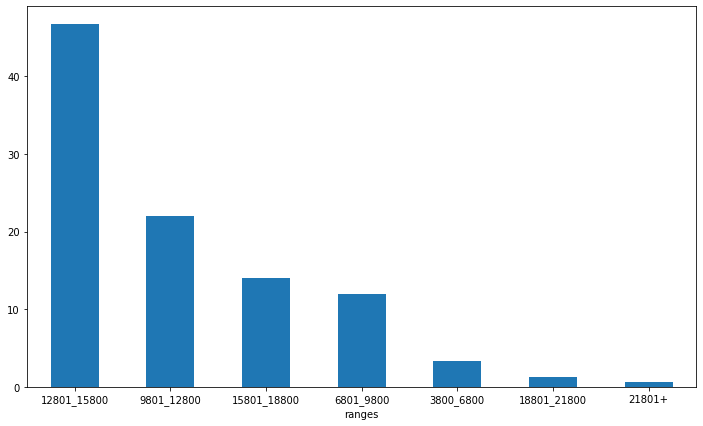

In [13]:
sales_pct = total \
    .groupby(level=0) \
    .apply(lambda x : 100 * x / total.sum()) \
    .sort_values(ascending=False)

sales_pct.plot.bar(rot=0)

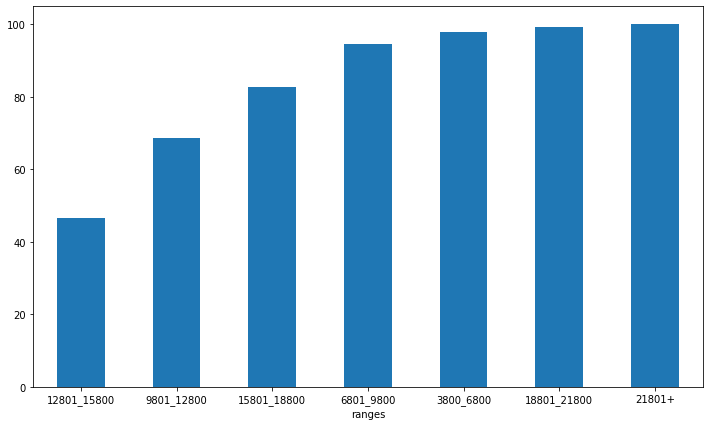

In [14]:
sales_pct.cumsum(axis = 0).plot.bar(rot=0)

In [15]:
crosstab = pandas.crosstab(data.ano, data.transmissao)
crosstab

transmissao,AUTO,MANUAL
ano,,
2000,3,0
2001,1,0
2002,1,0
2003,1,0
2004,3,0
2005,2,0
2006,5,1
2007,7,4
2008,10,4


Não faz sentido aplicar chi-square test com estas variáveis, porque elas não são variáveis categóricas.

https://manipulandodados.com.br/teste-chi-quadrado-pearson-tabelas-de-contingencia/

In [16]:
chi2_contingency(crosstab)

(11.14249741735537, 0.5167477620210608, 12, array([[ 2.56      ,  0.44      ],
        [ 0.85333333,  0.14666667],
        [ 0.85333333,  0.14666667],
        [ 0.85333333,  0.14666667],
        [ 2.56      ,  0.44      ],
        [ 1.70666667,  0.29333333],
        [ 5.12      ,  0.88      ],
        [ 9.38666667,  1.61333333],
        [11.94666667,  2.05333333],
        [35.84      ,  6.16      ],
        [41.81333333,  7.18666667],
        [13.65333333,  2.34666667],
        [ 0.85333333,  0.14666667]]))

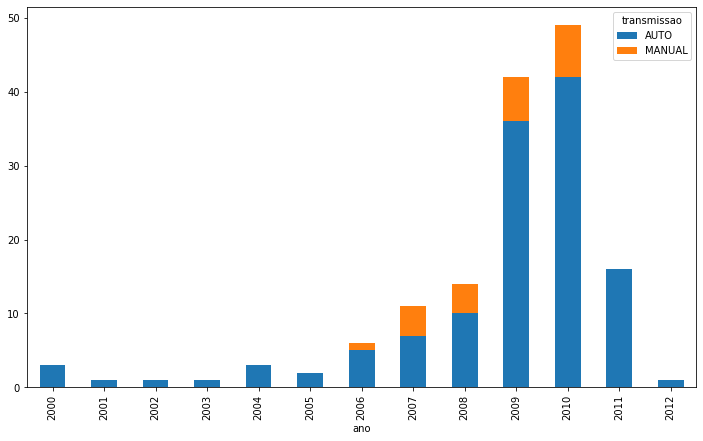

In [17]:
crosstab.plot.bar(stacked=True)